# Importing the data

In [482]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [483]:
data_raw=pd.read_csv('/content/train.csv')

In [484]:
data_raw

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [485]:
data_raw.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# Pre-analysis

In [486]:
corr = data_raw.corr() 
print(corr)

             PassengerId  Survived    Pclass       Age     SibSp     Parch  \
PassengerId     1.000000 -0.005007 -0.035144  0.036847 -0.057527 -0.001652   
Survived       -0.005007  1.000000 -0.338481 -0.077221 -0.035322  0.081629   
Pclass         -0.035144 -0.338481  1.000000 -0.369226  0.083081  0.018443   
Age             0.036847 -0.077221 -0.369226  1.000000 -0.308247 -0.189119   
SibSp          -0.057527 -0.035322  0.083081 -0.308247  1.000000  0.414838   
Parch          -0.001652  0.081629  0.018443 -0.189119  0.414838  1.000000   
Fare            0.012658  0.257307 -0.549500  0.096067  0.159651  0.216225   

                 Fare  
PassengerId  0.012658  
Survived     0.257307  
Pclass      -0.549500  
Age          0.096067  
SibSp        0.159651  
Parch        0.216225  
Fare         1.000000  


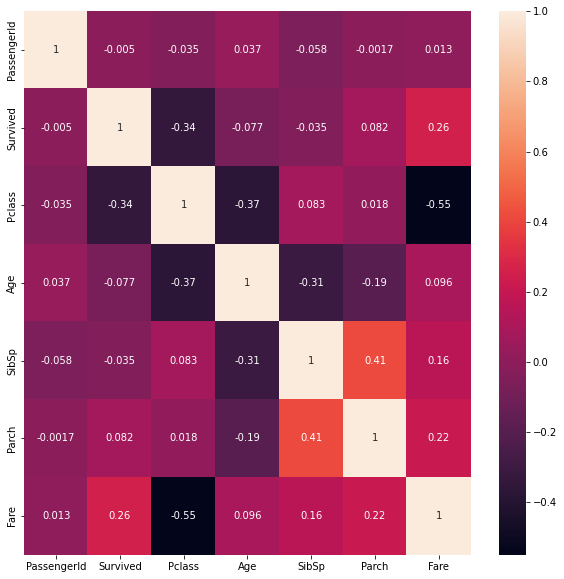

In [487]:
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True)

In [488]:
#print(data_raw['Ticket'].value_counts())
#print(data_raw['Name'].value_counts())
#print(data_raw['Survived'].value_counts())
#print(data_raw['Pclass'].value_counts())
#print(data_raw['SibSp'].value_counts())
#print(data_raw['Parch'].value_counts())
#print(data_raw['Fare'].value_counts())
print(data_raw['Cabin'].value_counts())
print(data_raw['Embarked'].value_counts())


B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64
S    644
C    168
Q     77
Name: Embarked, dtype: int64


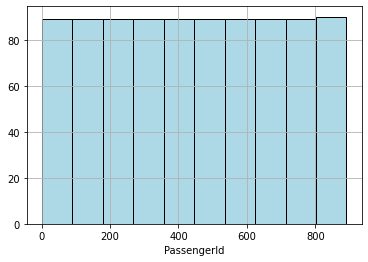

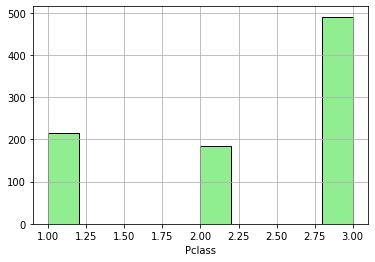

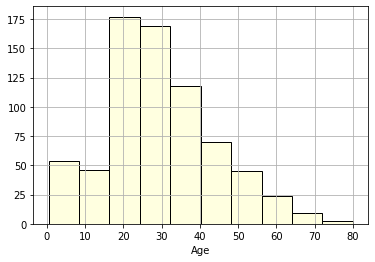

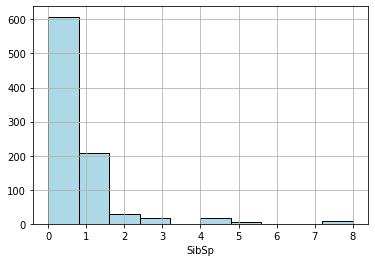

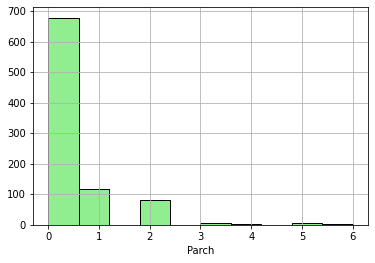

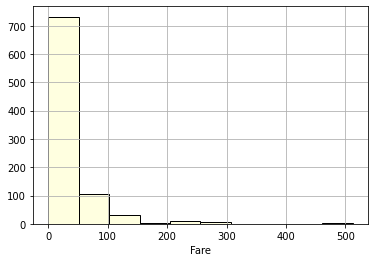

In [489]:
data_raw["PassengerId"].hist(color='lightblue',edgecolor = 'black')
plt.xlabel('PassengerId')
plt.show()
data_raw["Pclass"].hist(color='lightgreen',edgecolor = 'black')
plt.xlabel('Pclass')
plt.show()
data_raw["Age"].hist(color='lightyellow',edgecolor = 'black')
plt.xlabel('Age')
plt.show()
data_raw["SibSp"].hist(color='lightblue',edgecolor = 'black')
plt.xlabel('SibSp')
plt.show()
data_raw["Parch"].hist(color='lightgreen',edgecolor = 'black')
plt.xlabel('Parch')
plt.show()
data_raw["Fare"].hist(color='lightyellow',edgecolor = 'black')
plt.xlabel('Fare')
plt.show()



/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


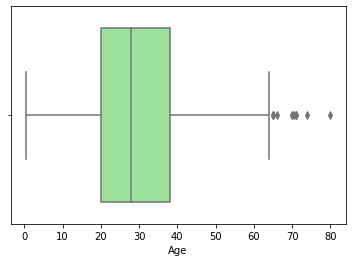

In [490]:
sns.boxplot(data_raw["Age"],color='lightgreen')
plt.show()

# Cleaning Data

In [491]:
data = data_raw.copy()
data.drop(["PassengerId","Name","Ticket","Cabin"],axis=1,inplace=True)
print(data)

     Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0           0       3    male  22.0      1      0   7.2500        S
1           1       1  female  38.0      1      0  71.2833        C
2           1       3  female  26.0      0      0   7.9250        S
3           1       1  female  35.0      1      0  53.1000        S
4           0       3    male  35.0      0      0   8.0500        S
..        ...     ...     ...   ...    ...    ...      ...      ...
886         0       2    male  27.0      0      0  13.0000        S
887         1       1  female  19.0      0      0  30.0000        S
888         0       3  female   NaN      1      2  23.4500        S
889         1       1    male  26.0      0      0  30.0000        C
890         0       3    male  32.0      0      0   7.7500        Q

[891 rows x 8 columns]


In [492]:
data.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

Text(0.5, 0, 'Age')

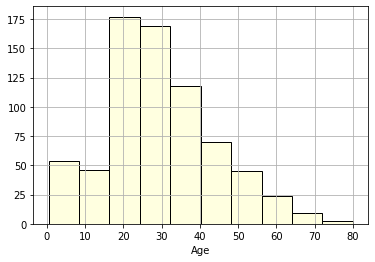

In [493]:
data["Age"].hist(color='lightyellow',edgecolor = 'black')
plt.xlabel('Age')

In [494]:
f_total = []
f_married = []
f_single = []
f_unknown = []

#creating list and series with women and man married or not
for i, v in data_raw[data_raw["Sex"]=="female"]["Name"].items():
  
  if "Mrs" in v:
    f_married.append(data_raw["Age"][i])
  elif "Miss" in v:
    f_single.append(data_raw["Age"][i])
  else:
    f_unknown.append(data_raw["Age"][i])
  f_total.append(data_raw["Age"][i])

S_f_married = pd.Series(f_married)
S_f_single = pd.Series(f_single)
S_f_unknown = pd.Series(f_unknown)
S_m_total = pd.Series(data_raw[data_raw['Sex']=='male']['Age'])

# Creating each mean



mean_f_married, mean_f_single, mean_f_unknown, mean_m_total = 0,0,0,0

if S_f_married.isna().sum() !=0:
  mean_f_married = S_f_married.dropna().mean()
if S_f_single.isna().sum() !=0:
  mean_f_single = S_f_single.dropna().mean()
if S_f_unknown.isna().sum() !=0:
  mean_f_unknown = S_f_unknown.dropna().mean()
if S_m_total.isna().sum() !=0:
  mean_m_total = S_m_total.dropna().mean()




# inverting the bool
not_Mrs = ~data_raw['Name'].str.contains("Mrs")
not_Miss = ~data_raw['Name'].str.contains("Miss")
'''

#data[(data_raw['Sex']=='female') & (data_raw["Name"].str.contains("Mrs"))]['Age'].replace(np.NaN, mean_f_married,inplace=True)
#data[(data_raw['Sex']=='female') & (data_raw["Name"].str.contains("Mrs"))]['Age'].replace('nan',np.NaN).fillna(mean_f_married,inplace=True)
#data[(data_raw['Sex']=='female') & (data_raw["Name"].str.contains("Mrs"))]['Age'] = data[(data_raw['Sex']=='female') & (data_raw["Name"].str.contains("Mrs"))]['Age'].fillna(mean_f_married,inplace=False)
data[(data_raw['Sex']=='female') & (data_raw["Name"].str.contains("Mrs"))]['Age'].fillna(mean_f_married,inplace=True)
data[(data_raw['Sex']=='female')& (data_raw['Name'].str.contains("Miss"))]['Age'].fillna(mean_f_single,inplace=True)
data[(data_raw['Sex']=='female')& (not_Mrs & not_Miss)]['Age'].fillna(mean_f_unknown,inplace=True)
data[data_raw['Sex']=='male']['Age'].fillna(mean_m_total,inplace=True)
'''

# inserting the mean in data
for i,v in data[(data_raw['Sex']=='female') & (data_raw["Name"].str.contains("Mrs"))]['Age'].items():
  data["Age"].loc[i]= mean_f_married
for i,v in data[(data_raw['Sex']=='female')& (data_raw['Name'].str.contains("Miss"))]['Age'].items():
  data["Age"].loc[i]= mean_f_single
for i,v in data[(data_raw['Sex']=='female')& (not_Mrs & not_Miss)]['Age'].items():
  data["Age"].loc[i]= mean_f_unknown
for i,v in data[data_raw['Sex']=='male']['Age'].items():
  data["Age"].loc[i]= mean_m_total


print(data[(data_raw['Sex']=='female') & (data_raw["Name"].str.contains("Mrs"))]['Age'].isna().sum())

print(mean_f_married)
print(mean_f_single)
print(mean_f_unknown)
print(mean_m_total)

print(f'Married: {f_married}')
print(f'Single: {f_single}')
print(f'Unknown: {f_unknown}')
print(f'Total: {f_total}')


'''
x =data['Age'].dropna()
y = np.mean(x)
data['Age'].fillna(y,inplace=True)
print(y)
'''

data['Embarked'].fillna('Unknown',inplace=True)
data.isna().sum()


/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


0
35.642857142857146
21.77777777777778
0
30.72664459161148
Married: [38.0, 35.0, 27.0, 14.0, 55.0, 31.0, nan, 38.0, nan, 40.0, 27.0, 18.0, 49.0, 29.0, 29.0, 33.0, 34.0, 47.0, 29.0, nan, 24.0, 22.0, 40.0, nan, 45.0, nan, 32.0, 44.0, 24.0, 35.0, 24.0, 29.0, 41.0, 29.0, nan, 50.0, 58.0, 41.0, 35.0, 19.0, 50.0, 17.0, 26.0, 24.0, 40.0, 22.0, 36.0, 31.0, nan, nan, 45.0, 60.0, nan, nan, 35.0, 24.0, 28.0, nan, 34.0, 28.0, 28.0, 19.0, nan, 42.0, 24.0, 45.0, nan, 33.0, 23.0, 63.0, 35.0, 25.0, 33.0, 54.0, 34.0, 36.0, 44.0, nan, 19.0, 48.0, 39.0, 36.0, 29.0, 53.0, 39.0, nan, 39.0, 52.0, 24.0, 22.0, 39.0, 26.0, 41.0, 32.0, nan, 40.0, 43.0, 18.0, 45.0, 24.0, 30.0, 48.0, 48.0, 36.0, 51.0, 57.0, 54.0, 43.0, 17.0, 31.0, 30.0, 31.0, 33.0, 52.0, 27.0, 62.0, 15.0, nan, 44.0, 18.0, 45.0, 24.0, 48.0, 42.0, 47.0, 28.0, 56.0, 25.0, 39.0]
Single: [26.0, 4.0, 58.0, 14.0, 15.0, 8.0, nan, nan, 18.0, 14.0, 3.0, 19.0, nan, 21.0, 5.0, 38.0, 17.0, 16.0, 30.0, nan, 17.0, 23.0, 28.0, 21.0, nan, 14.5, 20.0, 17.0, 2.0, 3

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [495]:
f = pd.DataFrame(data = [[0, 0]], columns = ['A', 'B']).astype('Int64')
f['C'] = f['A'] / f['B']
f.fillna(0)

,A,B,C
0,0,0,NaN


Text(0.5, 0, 'Age')

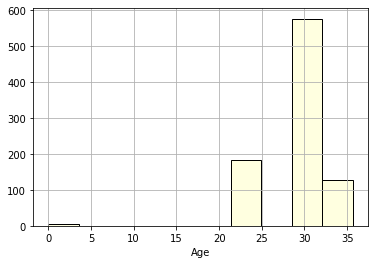

In [496]:
data["Age"].hist(color='lightyellow',edgecolor = 'black')
plt.xlabel('Age')

In [497]:
print(data)

     Survived  Pclass     Sex        Age  SibSp  Parch     Fare Embarked
0           0       3    male  30.726645      1      0   7.2500        S
1           1       1  female  35.642857      1      0  71.2833        C
2           1       3  female  21.777778      0      0   7.9250        S
3           1       1  female  35.642857      1      0  53.1000        S
4           0       3    male  30.726645      0      0   8.0500        S
..        ...     ...     ...        ...    ...    ...      ...      ...
886         0       2    male  30.726645      0      0  13.0000        S
887         1       1  female  21.777778      0      0  30.0000        S
888         0       3  female  21.777778      1      2  23.4500        S
889         1       1    male  30.726645      0      0  30.0000        C
890         0       3    male  30.726645      0      0   7.7500        Q

[891 rows x 8 columns]


In [498]:
print(data.isna().sum())
print(data['Age'].dtype)

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64
float64


#Chi-Square Independence Test


Although the name of this statistical test is similar to the previous test, the Chi-Square independence test has a different purpose compared to Chi-Square GoF. We use indepence test when we want to observe whether there is an association between two discrete or categorical variables.

To properly conduct this statistical test, we need to make sure that our data fulfills the following conditions:

-The two variables should be discrete or categorical variables

-The sample size of both categories should be large enough. As a rule of thumb, there should be 5 samples in each category

-The samples from both categories are randomly selected.


##Sex

In [499]:
print("Ho = hipotesis null, Survived do not differ significantly from Sex")
print("Ha = alternative hipotesis, Survived differ significantly from Sex")

ct = pd.crosstab(data["Survived"],data["Sex"])
print(ct)
chi2, p , dof, expected = stats.chi2_contingency(ct)

if (p>0.05):
  print(f"Ho was not rejected, p= {p}")
else:
  print(f"Ho was rejected, p= {p}")

Ho = hipotesis null, Survived do not differ significantly from Sex
Ha = alternative hipotesis, Survived differ significantly from Sex
Sex       female  male
Survived              
0             81   468
1            233   109
Ho was rejected, p= 1.1973570627755645e-58


##Pclass

In [500]:
print("Ho = hipotesis null, Survived do not differ significantly from Pclass")
print("Ha = alternative hipotesis, Survived differ significantly from Pclass")

ct = pd.crosstab(data['Pclass'], data['Survived'])
print(ct)
chi2, p , dof, expected = stats.chi2_contingency(ct)

if (p>0.05):
  print(f"Ho was not rejected, p= {p}")
else:
  print(f"Ho was rejected, p= {p}")

Ho = hipotesis null, Survived do not differ significantly from Pclass
Ha = alternative hipotesis, Survived differ significantly from Pclass
Survived    0    1
Pclass            
1          80  136
2          97   87
3         372  119
Ho was rejected, p= 4.549251711298793e-23


##SibSp

In [501]:
print("Ho = hipotesis null, Survived do not differ significantly from SibSp")
print("Ha = alternative hipotesis, Survived differ significantly from SibSp")

ct = pd.crosstab(data['SibSp'], data['Survived'])
print(ct)
chi2, p , dof, expected = stats.chi2_contingency(ct)

if (p>0.05):
  print(f"Ho was not rejected, p= {p}")
else:
  print(f"Ho was rejected, p= {p}")

Ho = hipotesis null, Survived do not differ significantly from SibSp
Ha = alternative hipotesis, Survived differ significantly from SibSp
Survived    0    1
SibSp             
0         398  210
1          97  112
2          15   13
3          12    4
4          15    3
5           5    0
8           7    0
Ho was rejected, p= 1.5585810465902147e-06


In [502]:
#without 2 last rows, because they have small data

print("Ho = hipotesis null, Survived do not differ significantly from SibSp")
print("Ha = alternative hipotesis, Survived differ significantly from SibSp")

ct = pd.crosstab(data['SibSp'], data['Survived'])
ct.drop([8,5],inplace=True)
print(ct)
chi2, p , dof, expected = stats.chi2_contingency(ct)

if (p>0.05):
  print(f"Ho was not rejected, p= {p}")
else:
  print(f"Ho was rejected, p= {p}")

Ho = hipotesis null, Survived do not differ significantly from SibSp
Ha = alternative hipotesis, Survived differ significantly from SibSp
Survived    0    1
SibSp             
0         398  210
1          97  112
2          15   13
3          12    4
4          15    3
Ho was rejected, p= 6.0554702010956636e-06


##Parch

In [503]:
print("Ho = hipotesis null, Survived do not differ significantly from Parch")
print("Ha = alternative hipotesis, Survived differ significantly from Parch")

ct = pd.crosstab(data['Parch'], data['Survived'])
print(ct)
chi2, p , dof, expected = stats.chi2_contingency(ct)

if (p>0.05):
  print(f"Ho was not rejected, p= {p}")
else:
  print(f"Ho was rejected, p= {p}")




Ho = hipotesis null, Survived do not differ significantly from Parch
Ha = alternative hipotesis, Survived differ significantly from Parch
Survived    0    1
Parch             
0         445  233
1          53   65
2          40   40
3           2    3
4           4    0
5           4    1
6           1    0
Ho was rejected, p= 9.703526421039997e-05


In [504]:
#without 4 last rows, because they have small data

print("Ho = hipotesis null, Survived do not differ significantly from Parch")
print("Ha = alternative hipotesis, Survived differ significantly from Parch")

ct = pd.crosstab(data['Parch'], data['Survived'])
ct.drop([6,5,4,3],inplace=True)
print(ct)
chi2, p , dof, expected = stats.chi2_contingency(ct)

if (p>0.05):
  print(f"Ho was not rejected, p= {p}")
else:
  print(f"Ho was rejected, p= {p}")

Ho = hipotesis null, Survived do not differ significantly from Parch
Ha = alternative hipotesis, Survived differ significantly from Parch
Survived    0    1
Parch             
0         445  233
1          53   65
2          40   40
Ho was rejected, p= 9.886126509051846e-06


##Embarked

In [505]:
#without 4 last rows, because they have small data

print("Ho = hipotesis null, Survived do not differ significantly from Embarked")
print("Ha = alternative hipotesis, Survived differ significantly from Embarked")

ct = pd.crosstab(data['Embarked'], data['Survived'])
print(ct)
ct.drop('Unknown',inplace=True)

chi2, p , dof, expected = stats.chi2_contingency(ct)

if (p>0.05):
  print(f"Ho was not rejected, p= {p}")
else:
  print(f"Ho was rejected, p= {p}")

Ho = hipotesis null, Survived do not differ significantly from Embarked
Ha = alternative hipotesis, Survived differ significantly from Embarked
Survived    0    1
Embarked          
C          75   93
Q          47   30
S         427  217
Unknown     0    2
Ho was rejected, p= 1.769922284120912e-06


#Two-Sample t-Test


So far, we have covered the case where we want to infer one variable. In some cases, what we want to do instead is to compare two independent variables and observe whether there is any significant difference between two variables. For this purpose, we can use a two-sample t-test.

To properly conduct this test, we need to make sure that our data fulfills the following conditions.

-Two variables are independent

-Two variables are randomly selected from their population

-Two variables are continuous variables and have normal distribution distribution

-The result of the statistical test will be more robust or reliable if the sample size of two variables are the same.

## Age

In [506]:
t,p= stats.ttest_ind(data[data["Survived"]==0]["Age"],data[data["Survived"]==1]["Age"] )

print("Ho = hipotesis null, the Survived do not differ significantly from Age")
print("Ha = alternative hipotesis, the Survived differ significantly from Age")

if (p>0.05):
  print(f"Ho was not rejected, p= {p}")
else:
  print(f"Ho was rejected, p= {p}")

Ho = hipotesis null, the Survived do not differ significantly from Age
Ha = alternative hipotesis, the Survived differ significantly from Age
Ho was rejected, p= 5.776931212456581e-07


#Kruskal-Wallis H-test 

tests the null hypothesis that the population median of all of the groups are equal. It is a non-parametric version of ANOVA. The test works on 2 or more independent samples, which may have different sizes. Note that rejecting the null hypothesis does not indicate which of the groups differs. Post hoc comparisons between groups are required to determine which groups are different.

## Fare

In [507]:
x = data[data["Survived"]==0]["Fare"]
y = data[data["Survived"]==1]["Fare"]
t,p= stats.kruskal(x,y)

print("Ho = hipotesis null, the Survived do not differ significantly from Fare")
print("Ha = alternative hipotesis, the Survived differ significantly from Fare")

if (p>0.05):
  print(f"Ho was not rejected, p= {p}")
else:
  print(f"Ho was rejected, p= {p}")

Ho = hipotesis null, the Survived do not differ significantly from Fare
Ha = alternative hipotesis, the Survived differ significantly from Fare
Ho was rejected, p= 4.547532067492866e-22


In [508]:
x = data[data["Embarked"]=='C']["Fare"]
y = data[data["Embarked"]=='Q']["Fare"]
w = data[data["Embarked"]=='S']["Fare"]
z = data[data["Embarked"]=='Unknown']["Fare"]
t,p= stats.kruskal(x,y)

print("Ho = hipotesis null, the Embarked do not differ significantly from Fare")
print("Ha = alternative hipotesis, the Embarked differ significantly from Fare")

if (p>0.05):
  print(f"Ho was not rejected, p= {p}")
else:
  print(f"Ho was rejected, p= {p}")

Ho = hipotesis null, the Embarked do not differ significantly from Fare
Ha = alternative hipotesis, the Embarked differ significantly from Fare
Ho was rejected, p= 1.0994721986857202e-10


#Statistical tests info

### **Parametric statistical tests (normal distribution)**
---
-Z-test: difference between a sample and the population with standard deviation
`ztest`

---
-One-Sample t-test: Same as Z-test without standard deviation
`ttest_1samp`

---
-Paired t-tests: difference between two samples
`ttest_rel`

---
Two-Sample t-Test: there is any significant difference between two variables
`ttest_ind`

---
-ANOVA tests:more than two groups
`f_oneway`

---
-Correlation test, Pearson’s:

---
-Independent t-tests:

---
-F-test:

---



### **Non-Parametric Statistical Tests**

-Chi-Square Goodness-of-Fit, GoF(**not continuous**): compare the observed frequencies of a sample with its expected frequencies
`chisquare`

---
-Chi-square test of independence(**not continuous**): there is an association between two discrete or categorical variables
`chi2_contingency`

---

-Wilcoxon rank-sum test:

---
-Kruskal-Wallis H test(**continuous or categorical data**): compare the means of two or more groups 
`kruskal`

---
-The Friedman Test: 

---
-The Cochran’s Q Test:

---
-The Jonckheere-Terpstra Test:

---

### References

---

https://www.stratascratch.com/blog/basic-types-of-statistical-tests-in-data-science/#:~:text=for%20population%20mean.-,Z%2Dtest%20for%20Population%20Mean,mean%20against%20the%20population%20mean.

---

https://vitalflux.com/different-types-of-statistical-tests-concepts-examples/#:~:text=Statistical%20tests%20are%20an%20important,difference%20between%20the%20two%20groups.

---

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kruskal.html



#Graph analysis

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


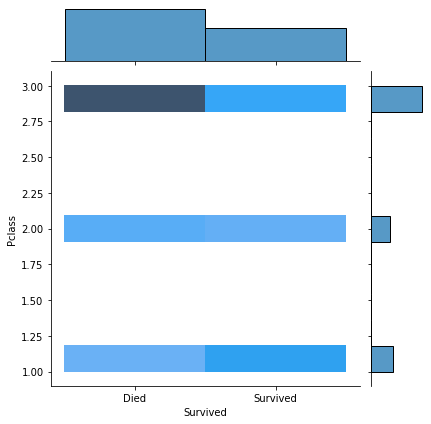

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


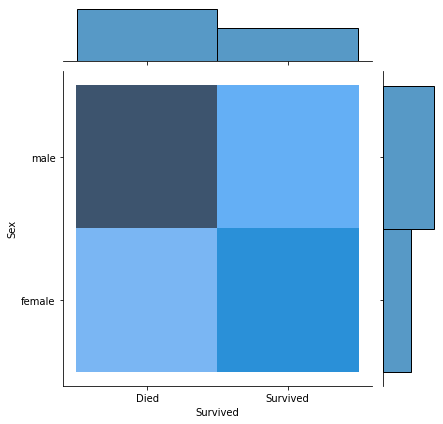

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


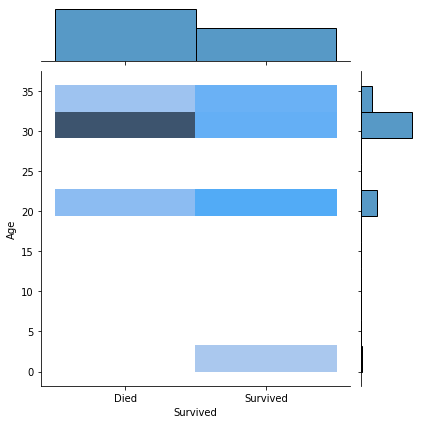

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


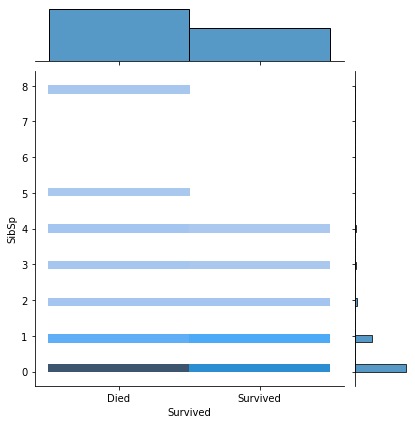

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


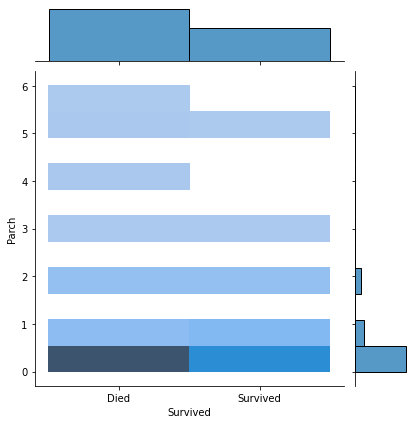

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


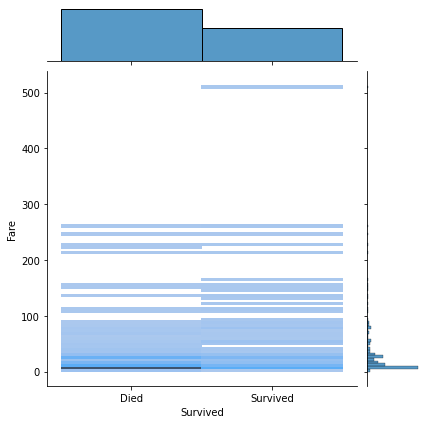

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


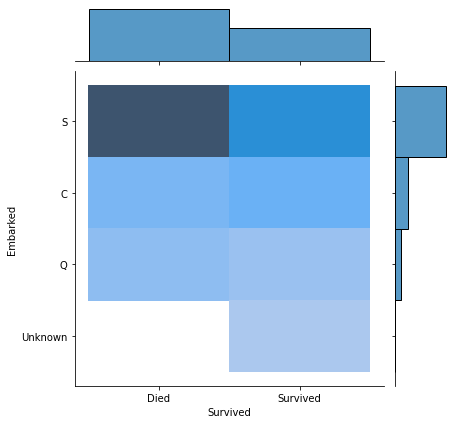

In [509]:

Surv_temp = data["Survived"].replace([0,1],['Died','Survived'])
for x in data.columns:
  #plt.figure(figsize=(20,5))
  if x != "Survived":
    sns.jointplot(Surv_temp,data[x], kind='hist')
    plt.show()

#Changing all data to numbers

In [510]:
#cleaning
data_only_num = data_raw.copy()
data_only_num.drop(['Ticket',"Cabin"],axis=1,inplace=True)
'''
data_only_num.drop(["Ticket","Cabin"],axis=1,inplace=True)
x =data_only_num['Age'].dropna()
y = np.mean(x)
data_only_num['Age'].fillna(y,inplace=True)
data_only_num['Embarked'].fillna('Unknown',inplace=True)
'''

f_total = []
f_married = []
f_single = []
f_unknown = []

#creating list and series with women and man married or not
for i, v in data_raw[data_raw["Sex"]=="female"]["Name"].items():
  
  if "Mrs" in v:
    f_married.append(data_raw["Age"][i])
  elif "Miss" in v:
    f_single.append(data_raw["Age"][i])
  else:
    f_unknown.append(data_raw["Age"][i])
  f_total.append(data_raw["Age"][i])

S_f_married = pd.Series(f_married)
S_f_single = pd.Series(f_single)
S_f_unknown = pd.Series(f_unknown)
S_m_total = pd.Series(data_raw[data_raw['Sex']=='male']['Age'])

# Creating each mean

mean_f_married, mean_f_single, mean_f_unknown, mean_m_total = 0,0,0,0

if S_f_married.isna().sum() !=0:
  mean_f_married = S_f_married.dropna().mean()
if S_f_single.isna().sum() !=0:
  mean_f_single = S_f_single.dropna().mean()
if S_f_unknown.isna().sum() !=0:
  mean_f_unknown = S_f_unknown.dropna().mean()
if S_m_total.isna().sum() !=0:
  mean_m_total = S_m_total.dropna().mean()

# inverting the bool
not_Mrs = ~data_raw['Name'].str.contains("Mrs")
not_Miss = ~data_raw['Name'].str.contains("Miss")

# inserting the mean in data
for i,v in data[(data_raw['Sex']=='female') & (data_raw["Name"].str.contains("Mrs"))]['Age'].items():
  data_only_num["Age"].loc[i]= mean_f_married
for i,v in data[(data_raw['Sex']=='female')& (data_raw['Name'].str.contains("Miss"))]['Age'].items():
  data_only_num["Age"].loc[i]= mean_f_single
for i,v in data[(data_raw['Sex']=='female')& (not_Mrs & not_Miss)]['Age'].items():
  data_only_num["Age"].loc[i]= mean_f_unknown
for i,v in data[data_raw['Sex']=='male']['Age'].items():
  data_only_num["Age"].loc[i]= mean_m_total

'''
print(mean_f_married)
print(mean_f_single)
print(mean_f_unknown)
print(mean_m_total)

print(f'Married: {f_married}')
print(f'Single: {f_single}')
print(f'Unknown: {f_unknown}')
print(f'Total: {f_total}')
'''

data_only_num['Embarked'].fillna('Unknown',inplace=True)


print(data_only_num.isna().sum())
data_only_num

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,30.726645,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,35.642857,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,21.777778,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.642857,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,30.726645,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,30.726645,0,0,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,21.777778,0,0,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,21.777778,1,2,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,30.726645,0,0,30.0000,C


In [511]:
data_only_num["Sex"].replace(['male','female'],[0,1],inplace=True)
data_only_num["Embarked"].replace(['Unknown','C','Q','S'],[0,1,2,3],inplace=True)
print(data_only_num)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name  Sex        Age  SibSp  \
0                              Braund, Mr. Owen Harris    0  30.726645      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...    1  35.642857      1   
2                               Heikkinen, Miss. Laina    1  21.777778      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)    1  35.642857      1   
4                             Allen, Mr. William Henry    0  30.726645      0   
..                                                 ...  .

In [512]:
print(data_only_num.info())
print(data_only_num.describe())
print(data_only_num.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Fare         891 non-null    float64
 9   Embarked     891 non-null    int64  
dtypes: float64(2), int64(7), object(1)
memory usage: 69.7+ KB
None
       PassengerId    Survived      Pclass         Sex         Age  \
count   891.000000  891.000000  891.000000  891.000000  891.000000   
mean    446.000000    0.383838    2.308642    0.352413   29.427017   
std     257.353842    0.486592    0.836071    0.477990    4.841319   
min       1.000000    0.000000    1.000000 

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


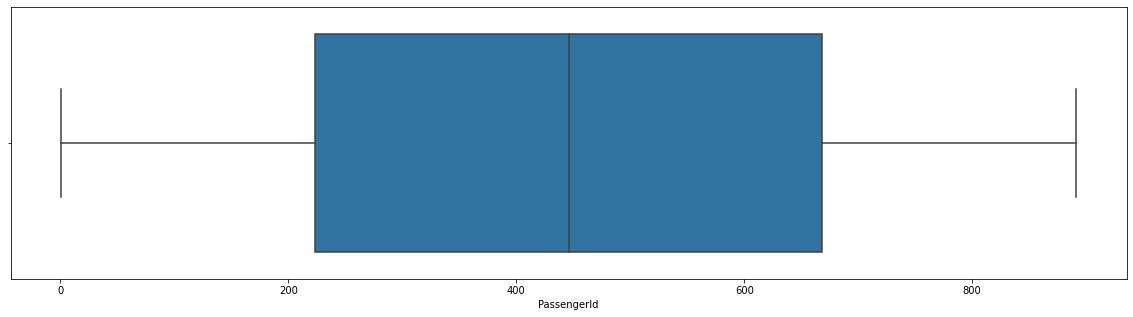

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


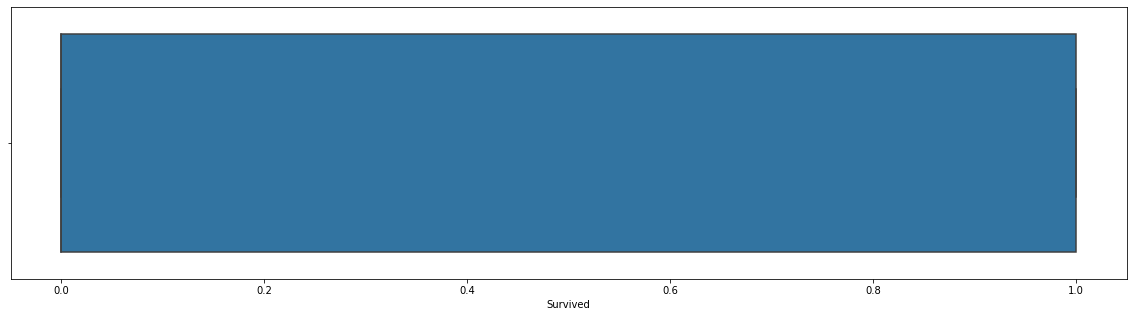

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


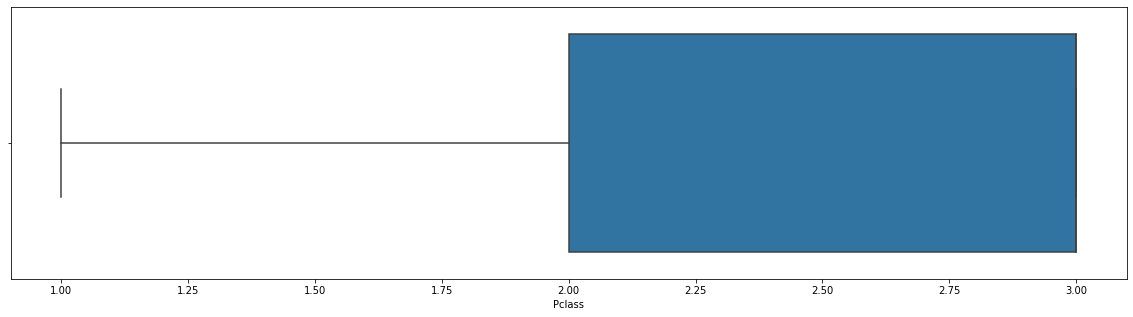

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


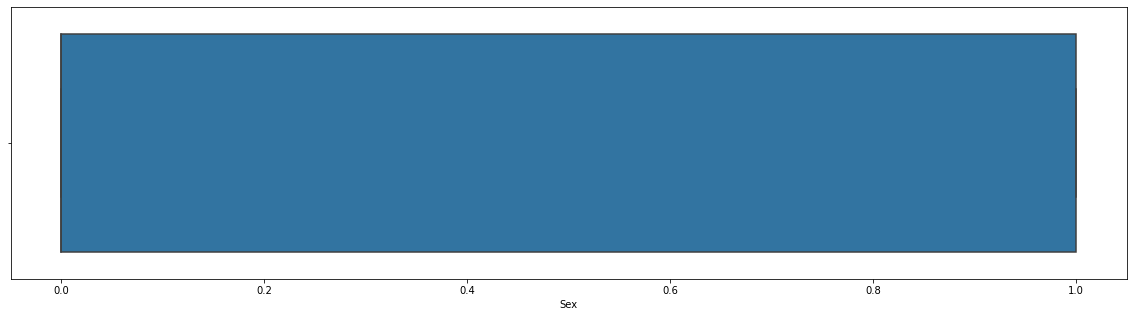

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


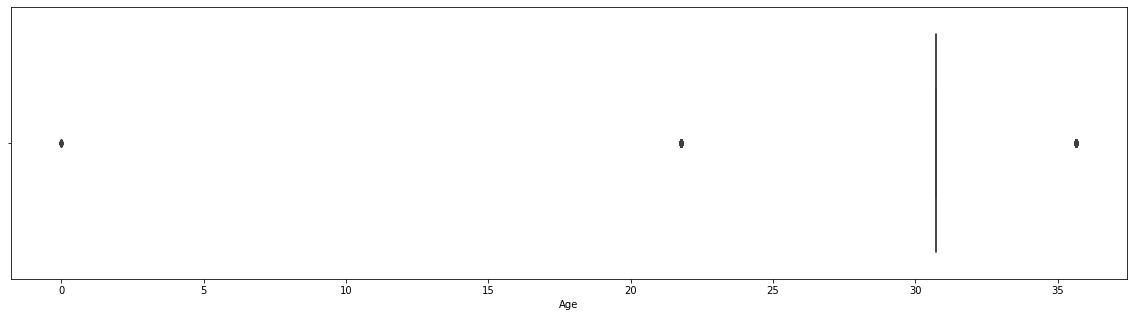

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


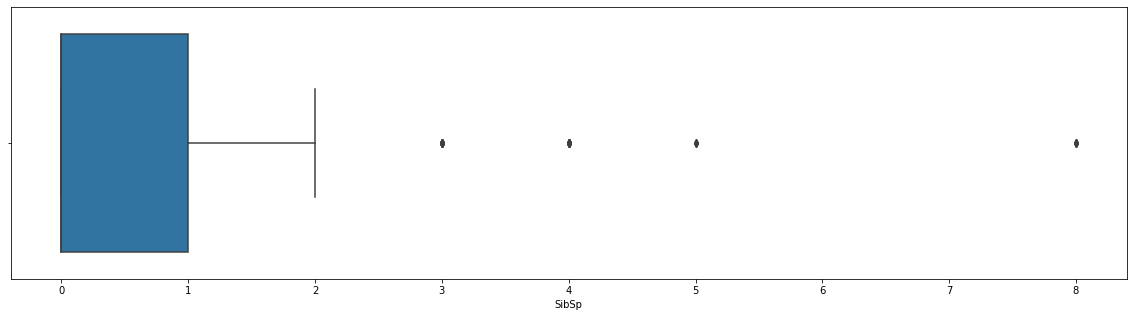

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


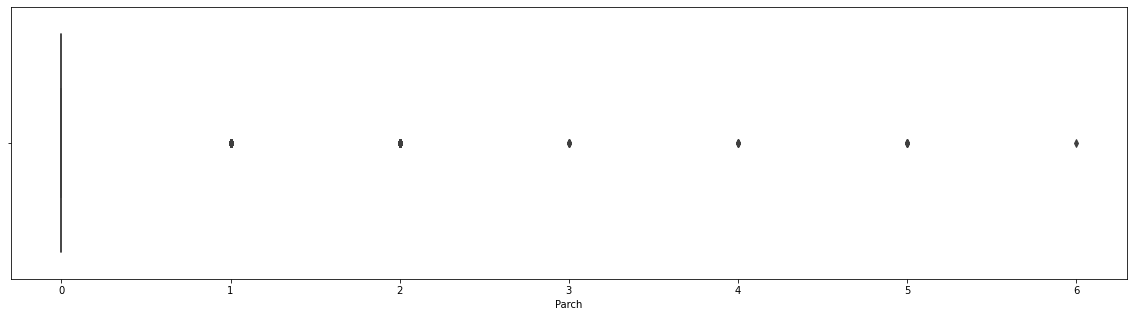

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


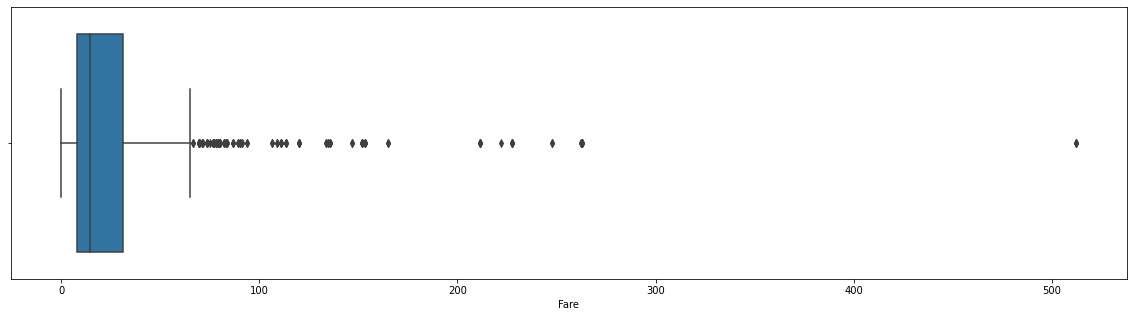

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


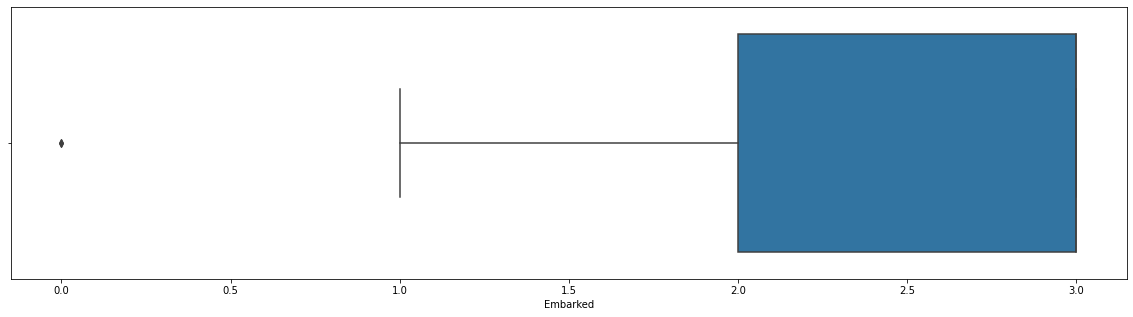

In [513]:

for x in data_only_num.columns:
  
  if (x != 'Name'):
    plt.figure(figsize=(20,5))
    #sns.boxplot(data=data[x])
    sns.boxplot(data_only_num[x]) 
    plt.show()

In [514]:

#Creating a column with numbers representing the titles

data_only_num['Title'] = data_only_num.index*10

print(type(data_only_num['Name']))
for i , v in data_only_num['Name'].items():
  if ('Capt. ' in v) or ('Col. ' in v) or ('Major. ' in v) or ('Dr. ' in v) or ('Rev. ' in v):
    data_only_num['Title'].iloc[i]= 2
  elif ('Jonkheer. ' in v) or ('Don. ' in v) or ('Sir. ' in v) or ('the Countess. ' in v) or ('Lady. ' in v):
    data_only_num['Title'].iloc[i]= 3
  elif ('Mme. ' in v) or ('Ms. ' in v) or ('Mrs. ' in v):
    data_only_num['Title'].iloc[i]= 4
  elif ('Mlle. ' in v) or ('Miss. ' in v):
    data_only_num['Title'].iloc[i]= 5
  elif ('Master. ' in v):
    data_only_num['Title'].iloc[i]= 6
  elif ('Mr. ' in v):
    data_only_num['Title'].iloc[i]= 7
  else:
    data_only_num['Title'].iloc[i]= 0

print(data_only_num['Title'].value_counts())
print(data_only_num)

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


<class 'pandas.core.series.Series'>
7    517
5    184
4    127
6     40
2     18
3      5
Name: Title, dtype: int64
     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name  Sex        Age  SibSp  \
0                              Braund, Mr. Owen Harris    0  30.726645      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...    1  35.642857      1   
2                               Heikkinen, Miss. Laina    1  21.777778      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)    1  35.642857      1   
4                     

2     18
3      5
4    127
5    184
6     40
7    517
Name: Title, dtype: int64
       PassengerId  Survived    Pclass       Sex        Age     SibSp  \
Title                                                                   
2       545.055556  0.277778  1.444444  0.055556  29.019609  0.333333   
3       554.200000  0.600000  1.000000  0.400000  25.564558  0.400000   
4       452.433071  0.795276  1.992126  1.000000  35.081552  0.685039   
5       411.793478  0.701087  2.293478  1.000000  21.734774  0.706522   
6       414.975000  0.575000  2.625000  0.000000  30.726645  2.300000   
7       454.499033  0.156673  2.410058  0.000000  30.726645  0.288201   

          Parch       Fare  Embarked  
Title                                 
2      0.111111  35.786344  2.555556  
3      0.000000  42.150000  1.800000  
4      0.818898  45.075721  2.448819  
5      0.543478  43.967484  2.369565  
6      1.375000  34.703125  2.650000  
7      0.152805  24.441560  2.603482  


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


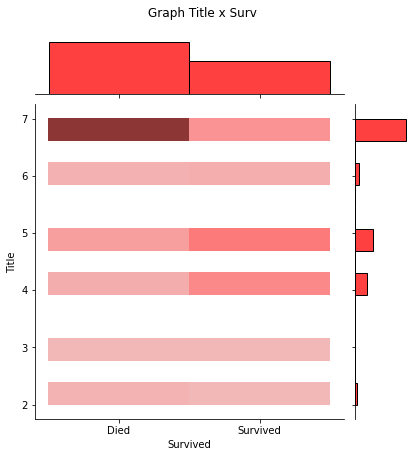

In [535]:
print(data_only_num['Title'].value_counts().sort_index(ascending=True))
print(data_only_num.groupby('Title').mean())

sns.jointplot(Surv_temp,data_only_num['Title'], kind='hist', color=[1,0,0,1])
plt.suptitle('Graph Title x Surv', y = 1.05)

plt.show()

#Questions

In [516]:
test=pd.read_csv('/content/train.csv')
print(test)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

In [517]:
#male/female survived
num_male = test[test["Sex"]=="male"]['Sex'].count()
num_female = test[test["Sex"]=="female"]['Sex'].count()
not_surv_male = test[(test["Sex"]=="male") & (test["Survived"]==0)]["Sex"].count()
not_surv_female = test[(test["Sex"]=="female") & (test["Survived"]==0)]["Sex"].count()
surv_male = test[(test["Sex"]=="male") & (test["Survived"]==1)]["Sex"].count()
surv_female = test[(test["Sex"]=="female") & (test["Survived"]==1)]["Sex"].count()

# % survived
m = [100*surv_male/num_male, 100*not_surv_male/num_male]
f = [100*surv_female/num_female, 100*not_surv_female/num_female]

print(f'Percent of men that survived: {m[0]}')
print(f'Percent of women that survived: {f[0]}')


Percent of men that survived: 18.890814558058924
Percent of women that survived: 74.20382165605096


In [518]:
print(data.groupby("Embarked")["Fare"].mean())


Embarked
C          59.954144
Q          13.276030
S          27.079812
Unknown    80.000000
Name: Fare, dtype: float64


In [519]:
# 1 - How many men are in the database?
print(data[data["Sex"]=="male"]['Sex'].count())

577


In [520]:
#2 - How many children are in the database (less than 12 years old)?
print(data[data['Age']<12]['Age'].count())

5


In [521]:
#3 - How many married women are in the database?
f_total = 0
f_married = 0
f_single = 0
f_unknown = 0



for i, v in data_raw[data_raw["Sex"]=="female"]["Name"].items():
  if "Mrs" in v:
    f_married+=1
  elif "Miss" in v:
    f_single+=1
  else:
    f_unknown+=1
  f_total+=1


print(f'Married: {f_married}')
print(f'Single: {f_single}')
print(f'Unknown: {f_unknown}')
print(f'Total: {f_total}')


Married: 129
Single: 180
Unknown: 5
Total: 314


In [522]:
#4 - What is the average age of survivors?
print(data[data['Survived']==1]['Age'].mean())

28.406171373368423


In [523]:
#5 - What is the price of the most expensive third-class ticket?
print(data[data["Pclass"]==3]['Fare'].max())

69.55


In [524]:
#6 - Which man paid the most expensive ticket?
print(data['Fare'].max())

512.3292


In [525]:
#7 - How old is the wife of the owner of the ship Mr. John Jacob Astor in the wreck?
for i, v in data_raw["Name"].items():
  if ("Jacob" in v) & ("Astor" in v):
    print(data_raw.iloc[i])

#print(data_raw[data_raw["Name"] in "Harris"])


PassengerId                                                  701
Survived                                                       1
Pclass                                                         1
Name           Astor, Mrs. John Jacob (Madeleine Talmadge Force)
Sex                                                       female
Age                                                         18.0
SibSp                                                          1
Parch                                                          0
Ticket                                                  PC 17757
Fare                                                     227.525
Cabin                                                    C62 C64
Embarked                                                       C
Name: 700, dtype: object


In [526]:
for i, v in data_raw["Name"].items():
  if ("Talmadge" in v) & ("Force" in v):
    print(data_raw.iloc[i])

PassengerId                                                  701
Survived                                                       1
Pclass                                                         1
Name           Astor, Mrs. John Jacob (Madeleine Talmadge Force)
Sex                                                       female
Age                                                         18.0
SibSp                                                          1
Parch                                                          0
Ticket                                                  PC 17757
Fare                                                     227.525
Cabin                                                    C62 C64
Embarked                                                       C
Name: 700, dtype: object


#Others

In [527]:
# Gruping the same last names
name_list = []
name_lists =[]
index_lists = []
for i,v in data_only_num["Name"].sort_values(ascending=True).iteritems():
  name_list = v.split(', ')
  name_lists.append(name_list[0])
  index_lists.append(i)
df_names = pd.DataFrame(data = name_lists, index = index_lists)
join_df = data_only_num.join(df_names, how='inner')
print(join_df.groupby(0).mean())
print(len(data_only_num))

               PassengerId  Survived  Pclass  Sex        Age  SibSp  Parch  \
0                                                                            
Abbing               846.0       0.0     3.0  0.0  30.726645    0.0    0.0   
Abbott               513.5       0.5     3.0  0.5  33.184751    1.0    1.0   
Abelson              592.0       0.5     2.0  0.5  33.184751    1.0    0.0   
Adahl                366.0       0.0     3.0  0.0  30.726645    0.0    0.0   
Adams                402.0       0.0     3.0  0.0  30.726645    0.0    0.0   
...                    ...       ...     ...  ...        ...    ...    ...   
de Mulder            287.0       1.0     3.0  0.0  30.726645    0.0    0.0   
de Pelsmaeker        283.0       0.0     3.0  0.0  30.726645    0.0    0.0   
del Carlo            362.0       0.0     2.0  0.0  30.726645    1.0    0.0   
van Billiard         154.0       0.0     3.0  0.0  30.726645    0.0    2.0   
van Melkebeke        869.0       0.0     3.0  0.0  30.726645    

#Conclusions


---
The column 'PassengerId' are Equally distributed, 'Name' and 'Ticket' have soo many different names and 'Cabin' has too many NaN, so they do not have correlation with 'Survived'.

---

For all the others columns, Ho was rejected with less then 5% on p-value, so they differ from Survived. P-value from them:

* Sex p= 1.1973570627755645e-58

* Pclass  p= 4.549251711298793e-23

* Fare p= 4.547532067492866e-22

* Embarked p= 1.769922284120912e-06

* SibSp p= 6.0554702010956636e-06

* Parch p= 9.886126509051846e-06

* Age p= 5.343261729736851e-05

---
**Sex have the smaller p-value, so it has the most correlation**

---
The Fares changes from Embarked places with p-value= 1.0994721986857202e-10. The Fares were higher in Cherbourg with average Fare of 59.94, after Southampton with 27.08 and for the last Queenstown with 13.28 

---
In our tests:

Percent of men that survived: 18.890814558058924

Percent of women that survived: 74.20382165605096

Confirming the correlation

---
**Questions**

* 1 - How many men are in the database?

577 men

* 2 - How many children are in the database (less than 12 years old)?

68 children

* 3 - How many married women are in the database?

129 women married

* 4 - What is the average age of survivors?

28.55 years old

* 5 - What is the price of the most expensive third-class ticket?

69.55

* 6 - Which man paid the most expensive ticket?

512.3292

* 7 - How old is the wife of the owner of the ship Mr. John Jacob Astor in the wreck?

18 years old

